## Install & Imports

In [ ]:
!pip install ultralytics

In [ ]:
import cv2
from ultralytics import YOLO
from matplotlib import pyplot as plt

## Train

In [ ]:
model = YOLO('yolov8n-seg.pt')
model.train(data='dataset/data.yaml', epochs=10, imgsz=640)

## Prediction

In [3]:
model = YOLO(r'E:\pytorch-course\yoloV8\Instance_Segmentatin\runs\segment\train\weights\best.pt')  # load a custom model
model.predict(r'E:\pytorch-course\yoloV8\Instance_Segmentatin\dataset\test\images\image11207_jpg.rf.d1273234bcb2b699859473b0536674ce.jpg', save=True, imgsz=640, conf=0.5, show=True)


image 1/1 E:\pytorch-course\yoloV8\Instance_Segmentatin\dataset\test\images\image11207_jpg.rf.d1273234bcb2b699859473b0536674ce.jpg: 480x640 1 Head, 214.8ms
Speed: 3.6ms preprocess, 214.8ms inference, 21.0ms postprocess per image at shape (1, 3, 640, 640)


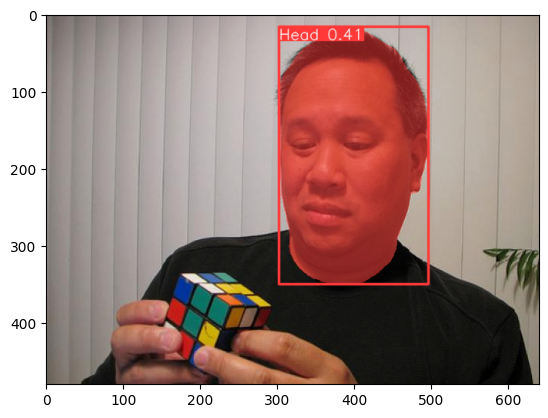

In [4]:
results = model(r'E:\pytorch-course\yoloV8\Instance_Segmentatin\dataset\test\images\image11207_jpg.rf.d1273234bcb2b699859473b0536674ce.jpg')

annotated_img = results[0].plot()

cv2.imshow("YOLOv8 Inference", annotated_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

annotated_img_RGB = cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB)
plt.imshow(annotated_img_RGB)


In [ ]:
video_path = "mixkit-look-of-an-exhausted-mixed-martial-arts-fighter-40978-medium.mp4"

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    
    success, frame = cap.read()

    if success:
        results = model(frame)

        annotated_frame = results[0].plot()

        cv2.imshow("YOLOv8 Inference", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        
        break

cap.release()
cv2.destroyAllWindows()